In [2]:
# importar pandas e tabelas
import pandas as pd
df = pd.read_csv('merged.csv')

# Verificar informações sobre os dados
print("Infomaçao de Dados:")
print(df.info())

Infomaçao de Dados:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36000 entries, 0 to 35999
Data columns (total 13 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   user_id                                       36000 non-null  int64  
 1   age                                           36000 non-null  int64  
 2   sex                                           36000 non-null  object 
 3   last_month_salary_median                      36000 non-null  int64  
 4   number_dependents_median                      36000 non-null  int64  
 5   total_loan                                    35575 non-null  float64
 6   clean_loan_type                               35575 non-null  object 
 7   more_90_days_overdue                          36000 non-null  int64  
 8   number_times_delayed_payment_loan_30_59_days  36000 non-null  int64  
 9   number_times_delayed_payment_loan_60_89_d


Random Forest:
Accuracy: 0.985

Confusion Matrix:
 [[7035   42]
 [  66   57]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      7077
           1       0.58      0.46      0.51       123

    accuracy                           0.98      7200
   macro avg       0.78      0.73      0.75      7200
weighted avg       0.98      0.98      0.98      7200



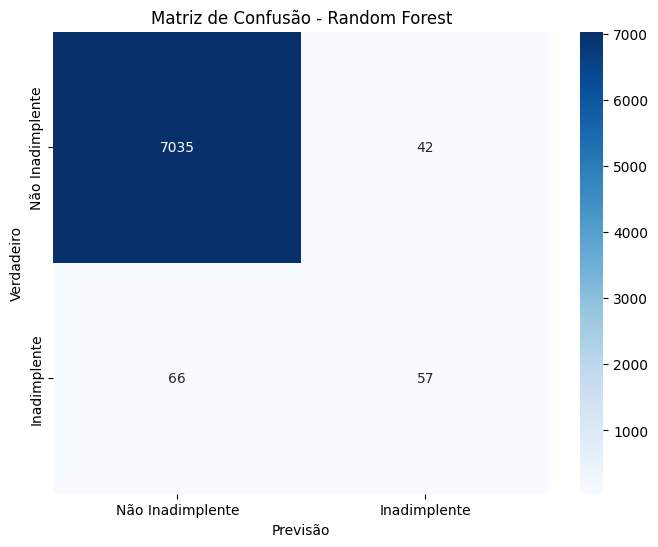


Apos balanceamento Random Forest:
Accuracy: 0.9826388888888888

Confusion Matrix:
 [[7007   70]
 [  55   68]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      7077
           1       0.49      0.55      0.52       123

    accuracy                           0.98      7200
   macro avg       0.74      0.77      0.76      7200
weighted avg       0.98      0.98      0.98      7200



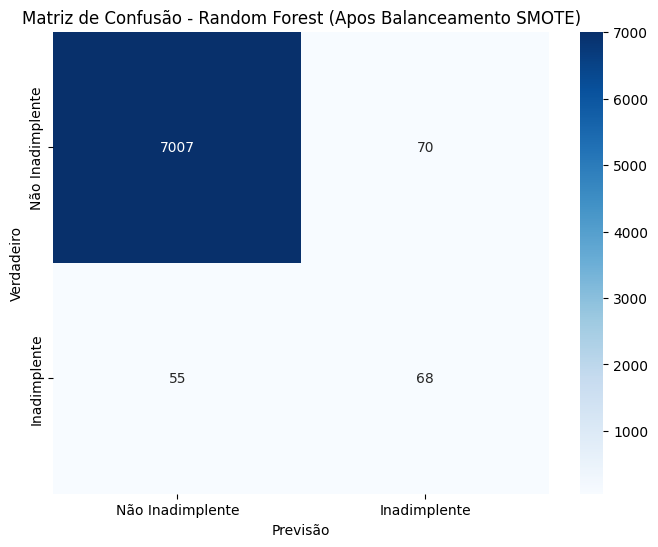

In [191]:
#importar biblio
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt

# Convertendo variáveis categóricas em numéricas
le = LabelEncoder()
df['sex'] = le.fit_transform(df['sex'])
df['clean_loan_type'] = le.fit_transform(df['clean_loan_type'])

# Preenchendo valores ausentes
df.fillna(df.median(), inplace=True)

# Dividir os dados em conjunto de treinamento e teste
#X = df[['more_90_days_overdue', 'number_times_delayed_payment_loan_30_59_days', 'age', 'number_times_delayed_payment_loan_60_89_days', 'total_loan', 'number_dependents_median']]
X = df[['more_90_days_overdue', 'age', 'total_loan', 'number_dependents_median']]
y = df['default_flag']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Criar e treinar o modelo de Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Fazer previsões e avaliar o modelo de Random Forest
y_pred_rf = rf_model.predict(X_test)
print("\nRandom Forest:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

# Visualizar a matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Não Inadimplente', 'Inadimplente'], yticklabels=['Não Inadimplente', 'Inadimplente'])
plt.xlabel('Previsão')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão - Random Forest')
plt.show()

# Aplicar SMOTE apenas no conjunto de treinamento para balancear
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Treinar o modelo de Random Forest novamente com os dados balanceados
rf_model_balanced = RandomForestClassifier(random_state=42)
rf_model_balanced.fit(X_train_resampled, y_train_resampled)

# Fazer previsões e avaliar o modelo de Random Forest após balanceamento
y_pred_rf_balanced = rf_model_balanced.predict(X_test)

# Imprimir métricas de avaliação após balanceamento
print("\nApos balanceamento Random Forest:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf_balanced))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf_balanced))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf_balanced))

# Visualizar a matriz de confusão após balanceamento
conf_matrix_balanced = confusion_matrix(y_test, y_pred_rf_balanced)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_balanced, annot=True, fmt='d', cmap='Blues', xticklabels=['Não Inadimplente', 'Inadimplente'], yticklabels=['Não Inadimplente', 'Inadimplente'])
plt.xlabel('Previsão')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão - Random Forest (Apos Balanceamento SMOTE)')
plt.show()

# Fazer previsões e avaliar o modelo de Árvore de Decisão apos
#y_pred_dt = rf_model.predict(X_test)
#print("\n Apos balanceamento Random Forest:")
#print("Accuracy:", accuracy_score(y_test, y_pred_dt))
#print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
#print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))


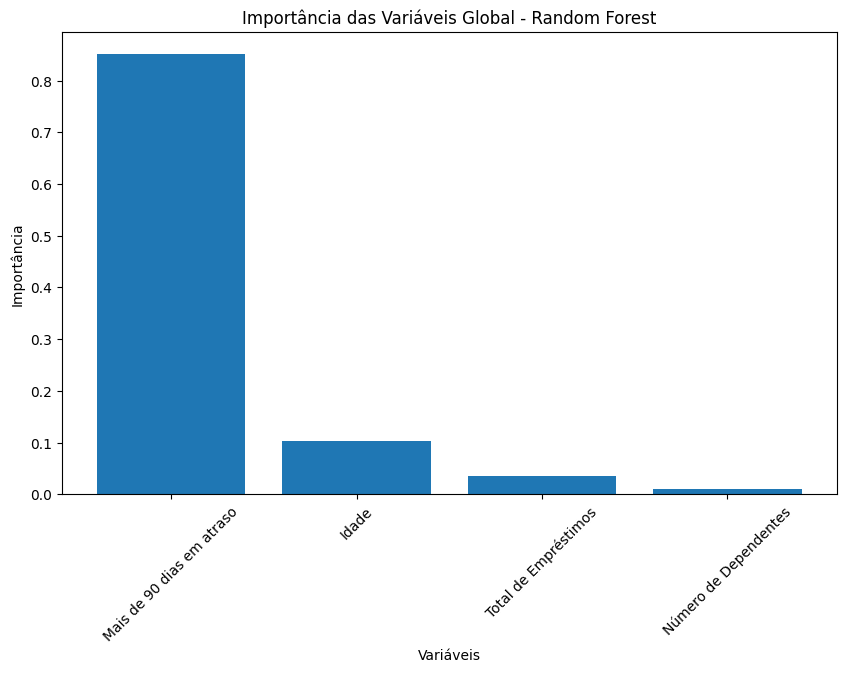

In [127]:
import matplotlib.pyplot as plt
import numpy as np

# Obter a importância das variáveis
importances = rf_model_balanced.feature_importances_
indices = np.argsort(importances)[::-1]

# Nome das variáveis
#feature_names = ['Mais de 90 dias em atraso', 'Atraso de 30-59 dias', 'Idade', 'Atraso de 60-89 dias', 'Total de Empréstimos', 'Número de Dependentes']
feature_names = ['Mais de 90 dias em atraso', 'Idade', 'Total de Empréstimos', 'Número de Dependentes']

# Plotar a importância das variáveis
plt.figure(figsize=(10, 6))
plt.title('Importância das Variáveis Global - Random Forest')
plt.bar(range(X_train.shape[1]), importances[indices], align='center')
plt.xticks(range(X_train.shape[1]), [feature_names[i] for i in indices], rotation=45)
plt.xlabel('Variáveis')
plt.ylabel('Importância')
plt.show()


**LIME** explica localmente: Mostra a **influência das características** para uma única observação.

In [5]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 5.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283835 sha256=44ae8a819fa1af6c499b4b62e26faa72e12c04fbbdccc0dee2a099169be557bf
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [128]:
import lime
import lime.lime_tabular
from IPython.display import display, HTML

# Criar um explicador LIME
explainer = lime.lime_tabular.LimeTabularExplainer(X_train, feature_names=feature_names, class_names=['Não Inadimplente', 'Inadimplente'], discretize_continuous=True)

# Escolher uma observação para explicar
i = 0
exp = explainer.explain_instance(X_test[i], rf_model_balanced.predict_proba, num_features=len(feature_names))

# Obter o HTML da explicação
exp_html = exp.as_html()

# Adicionar título e customizar estilo
custom_html = f"""
    <div style="font-family: Arial; font-size: 16px; color: white;">
        <h2 style="font-weight: bold;">Explicação da Previsão Local</h2>
        {exp_html}
    </div>
"""

# Mostrar o HTML customizado
display(HTML(custom_html))


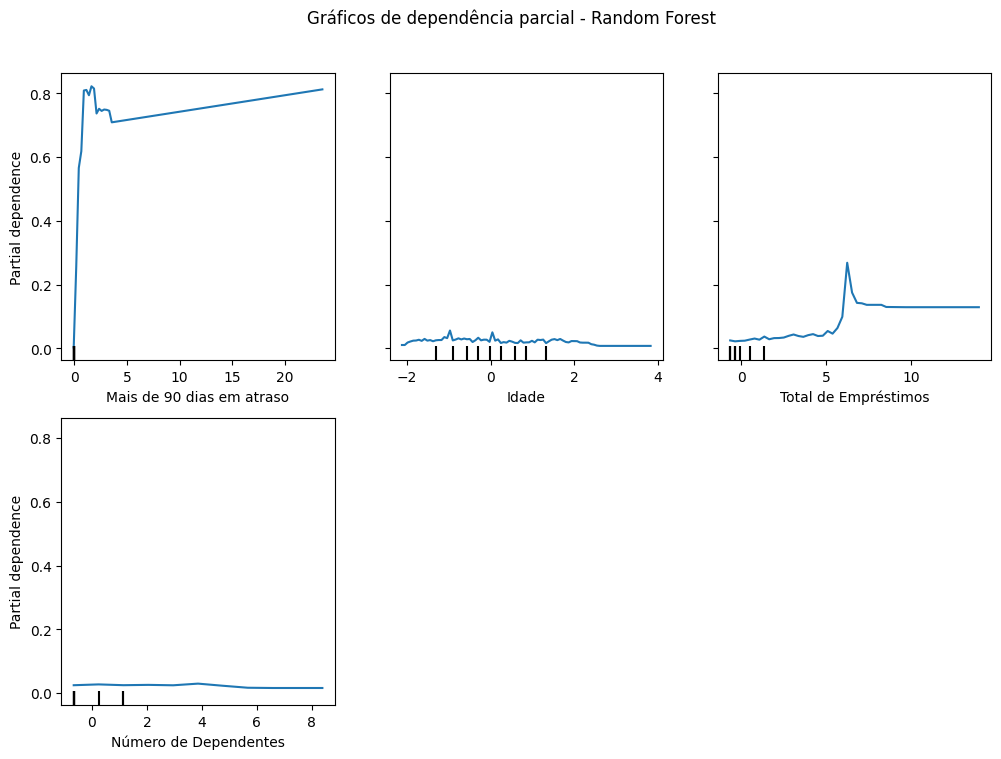

In [129]:
from sklearn.inspection import PartialDependenceDisplay

# Plotar Partial Dependence Plots
fig, ax = plt.subplots(figsize=(12, 8))
#PartialDependenceDisplay.from_estimator(rf_model, X_train, features=[0, 1, 2, 3, 4, 5], feature_names=feature_names, ax=ax)
PartialDependenceDisplay.from_estimator(rf_model_balanced, X_train, features=[0, 1, 2, 3], feature_names=feature_names, ax=ax)
plt.suptitle('Gráficos de dependência parcial - Random Forest')
plt.subplots_adjust(top=0.9)  # ajustar a posição do título
plt.show()


In [11]:
!pip install eli5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 4.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107720 sha256=549ed591e6fdf86ae5e7f801cb0bf192a9170b36b983bd744820e6992a34124b
  Stored in directory: /root/.cache/pip/wheels/b8/58/ef/2cf4c306898c2338d51540e0922c8e0d6028e07007085c0004
Successfully built eli5


In [130]:
import eli5
from eli5.sklearn import PermutationImportance
import matplotlib.pyplot as plt
from IPython.display import display, HTML

# Treinar o modelo de Random Forest novamente (se necessário)
rf_model_balanced.fit(X_train, y_train)

# Usar PermutationImportance para calcular a importância das variáveis
perm = PermutationImportance(rf_model_balanced, random_state=42).fit(X_test, y_test)

# Gerar a importância das variáveis usando eli5
weights_html = eli5.show_weights(perm, feature_names=feature_names).data

# Adicionar título e customizar estilo
custom_html = f"""
    <div style="font-family: Arial; font-size: 16px; color: black;">
        <h2 style="font-weight: bold;">Importância das Variáveis usando Permutation Importance</h2>
        {weights_html}
    </div>
"""

# Mostrar o HTML customizado
display(HTML(custom_html))



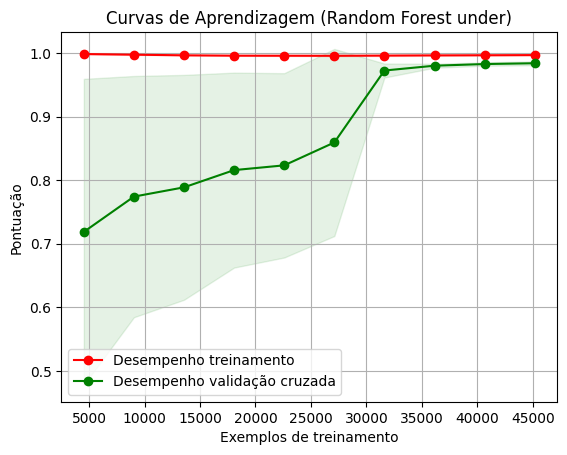

In [131]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve, KFold

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(0.1, 1.0, 10)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Exemplos de treinamento")
    plt.ylabel("Pontuação")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Desempenho treinamento")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Desempenho validação cruzada")

    plt.legend(loc="best")
    return plt

title = "Curvas de Aprendizagem (Random Forest)"
cv = KFold(n_splits=5)
plot_learning_curve(rf_model_balanced, title, X_train_resampled, y_train_resampled, cv=cv)
plt.show()


Resultados com dados Normalizados: 

Acurácia do modelo: 0.9841666666666666

Matriz de Confusão:
 [[7073    4]
 [ 110   13]]

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      7077
           1       0.76      0.11      0.19       123

    accuracy                           0.98      7200
   macro avg       0.87      0.55      0.59      7200
weighted avg       0.98      0.98      0.98      7200



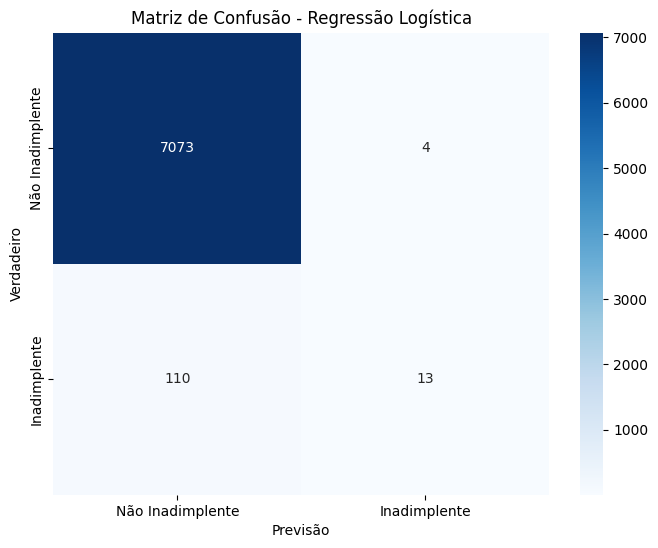

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solve


Resultados após a otimização dos hiperparâmetros e Balanceamento de classes: 

Melhores parâmetros encontrados: {'C': 100, 'penalty': 'l2'}

Acurácia do modelo após otimização: 0.9675

Matriz de Confusão após otimização:
 [[6852  225]
 [   9  114]]

Relatório de Classificação após otimização:
               precision    recall  f1-score   support

           0       1.00      0.97      0.98      7077
           1       0.34      0.93      0.49       123

    accuracy                           0.97      7200
   macro avg       0.67      0.95      0.74      7200
weighted avg       0.99      0.97      0.97      7200



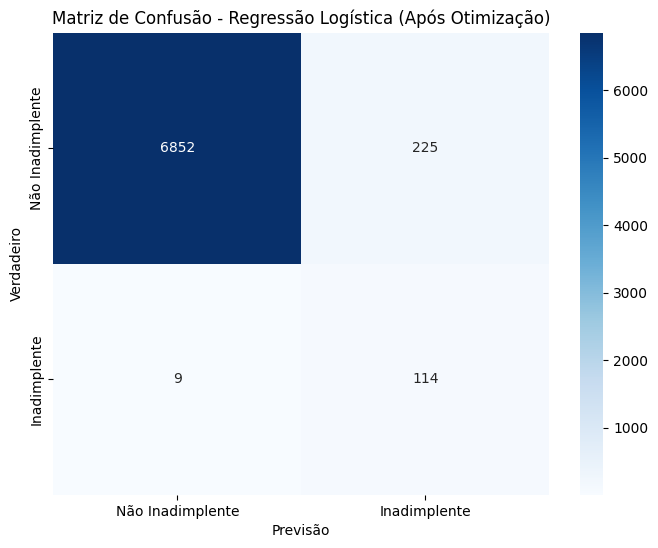

In [6]:
#importar bibliotecas
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# Balancear cria amostras sintéticas da classe minoritária
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV

# Convertendo variáveis categóricas em numéricas
le = LabelEncoder()
df['sex'] = le.fit_transform(df['sex'])
df['clean_loan_type'] = le.fit_transform(df['clean_loan_type'])

# Preenchendo valores ausentes
df.fillna(df.median(), inplace=True)

# Dividir os dados em conjunto de treinamento e teste
#X = df[['more_90_days_overdue', 'number_times_delayed_payment_loan_30_59_days', 'age', 'number_times_delayed_payment_loan_60_89_days', 'total_loan', 'number_dependents_median']]
X = df[['more_90_days_overdue', 'age', 'total_loan', 'number_dependents_median']]
y = df['default_flag']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Criar e treinar o modelo de regressão logística
model = LogisticRegression()
model.fit(X_train, y_train)

# Fazer previsões e avaliar o modelo
y_pred = model.predict(X_test)

# Imprimir resultados
print("Resultados com dados Normalizados: ")
print("\nAcurácia do modelo:", accuracy_score(y_test, y_pred))
print("\nMatriz de Confusão:\n", confusion_matrix(y_test, y_pred))
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred))

# Visualizar a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=['Não Inadimplente', 'Inadimplente'], yticklabels=['Não Inadimplente', 'Inadimplente'])
plt.xlabel('Previsão')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão - Regressão Logística')
plt.show()

# Aplicar SMOTE apenas no conjunto de treinamento para balancear
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

#O GridSearchCV é uma ferramenta poderosa para encontrar os melhores hiperparâmetros para um modelo, ajudando a otimizar seu desempenho.
# Definir os parâmetros para a busca em grade
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']}

# Criar o objeto GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5)

# Realizar a busca em grade de hiperparâmetros
grid_search.fit(X_train_resampled, y_train_resampled)

# Usar o modelo resultante da busca em grade
model = grid_search.best_estimator_

# Fazer previsões e avaliar o modelo
y_pred = model.predict(X_test)

# Imprimir resultados finais
print("\nResultados após a otimização dos hiperparâmetros e Balanceamento de classes: ")
print("\nMelhores parâmetros encontrados:", grid_search.best_params_)
print("\nAcurácia do modelo após otimização:", accuracy_score(y_test, y_pred))
print("\nMatriz de Confusão após otimização:\n", confusion_matrix(y_test, y_pred))
print("\nRelatório de Classificação após otimização:\n", classification_report(y_test, y_pred))

# Visualizar a matriz de confusão após otimização
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=['Não Inadimplente', 'Inadimplente'], yticklabels=['Não Inadimplente', 'Inadimplente'])
plt.xlabel('Previsão')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão - Regressão Logística (Após Otimização)')
plt.show()


Coeficiente das Variáveis (Coefficients): Mostra a **importância global** de cada variável no modelo. Geralmente usado em modelos lineares como regressão logística.

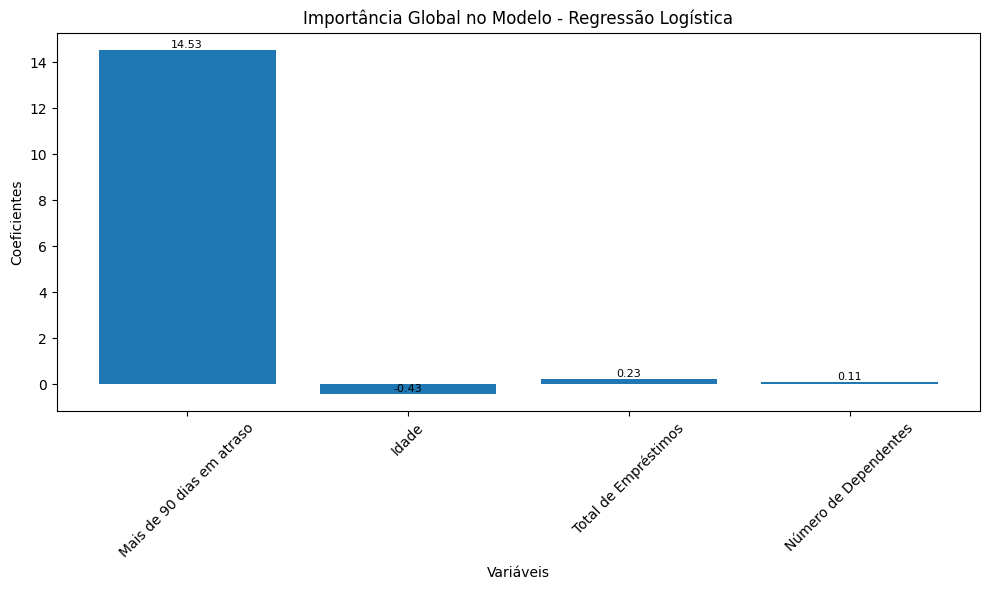

In [7]:
# Obter os coeficientes das variáveis
coefficients = model.coef_[0]

feature_names = [
    'Mais de 90 dias em atraso',
    'Idade',
    'Total de Empréstimos',
    'Número de Dependentes'
]

# Plotar os coeficientes das variáveis
plt.figure(figsize=(10, 6))
plt.title('Importância Global no Modelo - Regressão Logística')
bars = plt.bar(range(len(coefficients)), coefficients, align='center')
plt.xticks(range(len(coefficients)), feature_names, rotation=45)  # Usar os nomes das variáveis como rótulos
plt.xlabel('Variáveis')
plt.ylabel('Coeficientes')

# Adicionar rótulos às barras
for bar, coef in zip(bars, coefficients):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{coef:.2f}', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()


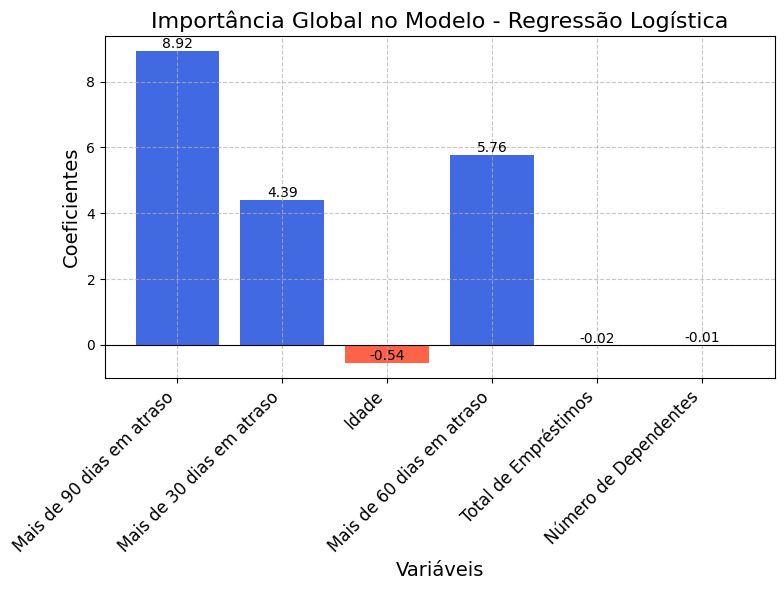

In [198]:
import matplotlib.pyplot as plt
import numpy as np

# Plotar os coeficientes das variáveis
coefficients = model.coef_[0]
feature_names = [
    'Mais de 90 dias em atraso',
    'Mais de 30 dias em atraso',
    'Idade',
    'Mais de 60 dias em atraso',
    'Total de Empréstimos',
    'Número de Dependentes'
]

plt.figure(figsize=(8, 6))
plt.title('Importância Global no Modelo - Regressão Logística', fontsize=16)
bars = plt.bar(range(len(coefficients)), coefficients, align='center', color=np.where(coefficients > 0, 'royalblue', 'tomato'))
plt.xticks(range(len(coefficients)), feature_names, rotation=45, ha='right', fontsize=12)  # Usar os nomes das variáveis como rótulos
plt.xlabel('Variáveis', fontsize=14)
plt.ylabel('Coeficientes', fontsize=14)

# Adicionar linha horizontal em y=0
plt.axhline(0, color='black', linewidth=0.8)

# Adicionar rótulos às barras
for bar, coef in zip(bars, coefficients):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{coef:.2f}', ha='center', va='bottom', fontsize=10, color='black')

plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


LIME (Local Interpretable Model-agnostic Explanations): Explica as **previsões de forma local**, ou seja, para instâncias individuais. Ele fornece uma explicação compreensível de como o modelo chegou a uma determinada previsão para uma observação específica.

In [8]:
import lime
import lime.lime_tabular

# Criar um explicador LIME
explainer = lime.lime_tabular.LimeTabularExplainer(X_train,
                                                   feature_names=feature_names,
                                                   class_names=['Não Inadimplente', 'Inadimplente'],
                                                   discretize_continuous=True)

# Escolher uma observação para explicar
i = 1
exp = explainer.explain_instance(X_test[i], model.predict_proba, num_features=len(feature_names))

# Visualizar a explicação
exp.show_in_notebook(show_table=True, show_all=False)

# Melhorias visuais e informações adicionais
print("\nExplicação:")
print("Probabilidades de previsão:")
print("Não Inadimplente:", exp.predict_proba[0])
print("Inadimplente:", exp.predict_proba[1])
print("\nRecursos e Valores:")
for feature, value in exp.as_list():
    print(f"{feature}: {value}")



Explicação:
Probabilidades de previsão:
Não Inadimplente: 0.8746046244727673
Inadimplente: 0.12539537552723268

Recursos e Valores:
Mais de 90 dias em atraso <= -0.06: -0.7454016811445261
Idade <= -0.77: 0.12521099904735725
Número de Dependentes > 0.24: 0.029890116523504467
-0.37 < Total de Empréstimos <= 0.20: -0.01849165148790436


Gráfico de Dependência Parcial (Partial Dependence Plots): Ajuda a entender como uma variável específica **afeta as previsões do modelo** enquanto mantém as outras variáveis constantes. Isso permite explorar as relações entre as variáveis de entrada e a variável de saída.

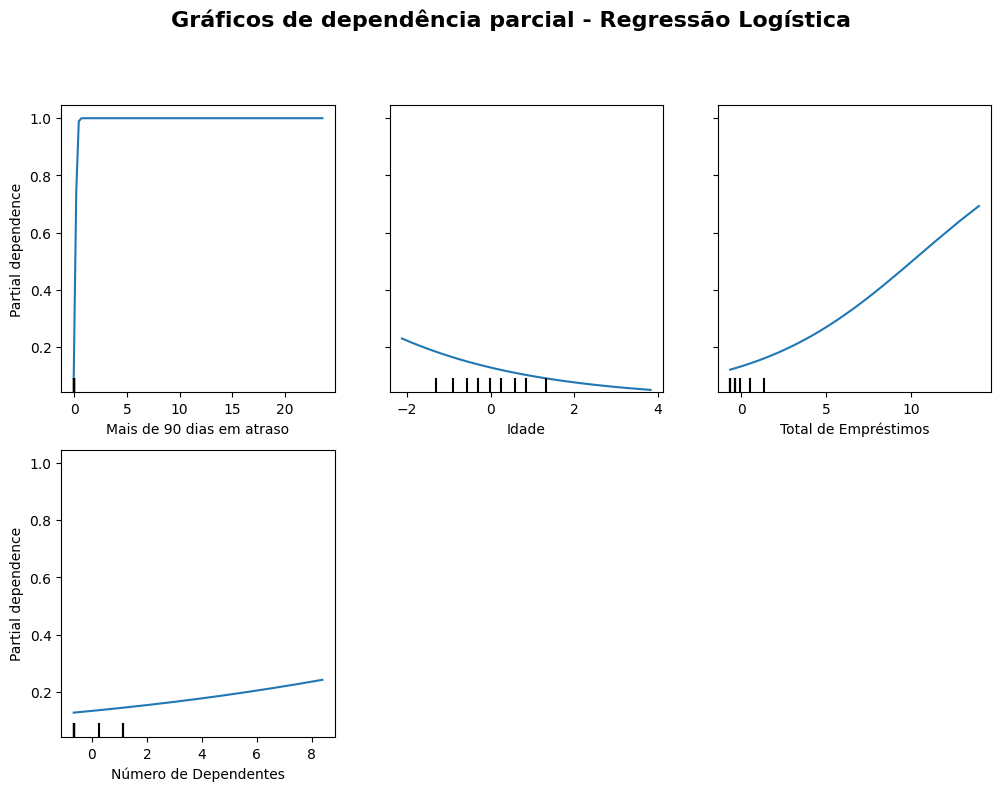

In [209]:
from sklearn.inspection import PartialDependenceDisplay

# Plotar Partial Dependence Plots
fig, ax = plt.subplots(figsize=(12, 8))
display = PartialDependenceDisplay.from_estimator(model, X_train, features=[0, 1, 2, 3], feature_names=feature_names, ax=ax)
display.figure_.suptitle('Gráficos de dependência parcial - Regressão Logística', fontsize=16, fontweight='bold', y=1.02)
#plt.ylabel('Efeito na Previsão', fontsize=12)
plt.subplots_adjust(top=0.9)  # ajustar a posição do título
plt.show()


Eli5 (Explain Like I'm 5): Ajuda a entender quais variáveis estão **contribuindo mais para as previsões** do modelo usando métodos de interpretabilidade de modelos, como a importância de permutação.

In [210]:
import eli5
from eli5.sklearn import PermutationImportance
from IPython.display import HTML

# Treinar o modelo de Random Forest novamente (se necessário)
model.fit(X_train, y_train)

# Usar PermutationImportance para calcular a importância das variáveis
perm = PermutationImportance(model, random_state=42).fit(X_test, y_test)

# Mostrar a importância das variáveis com título e texto em preto
weights_html = eli5.show_weights(perm, feature_names=feature_names).data

# Adicionar um título
styled_weights_html = f"<h3 style='color: black;'>contribuição para previsões</h3>{weights_html}"

# Adicionando estilo para trocar a cor do texto para preto
styled_weights_html = styled_weights_html.replace('<style>', '<style>body {color: black !important;} ')

# Mostrando a importância das variáveis com título e texto em preto
HTML(styled_weights_html)


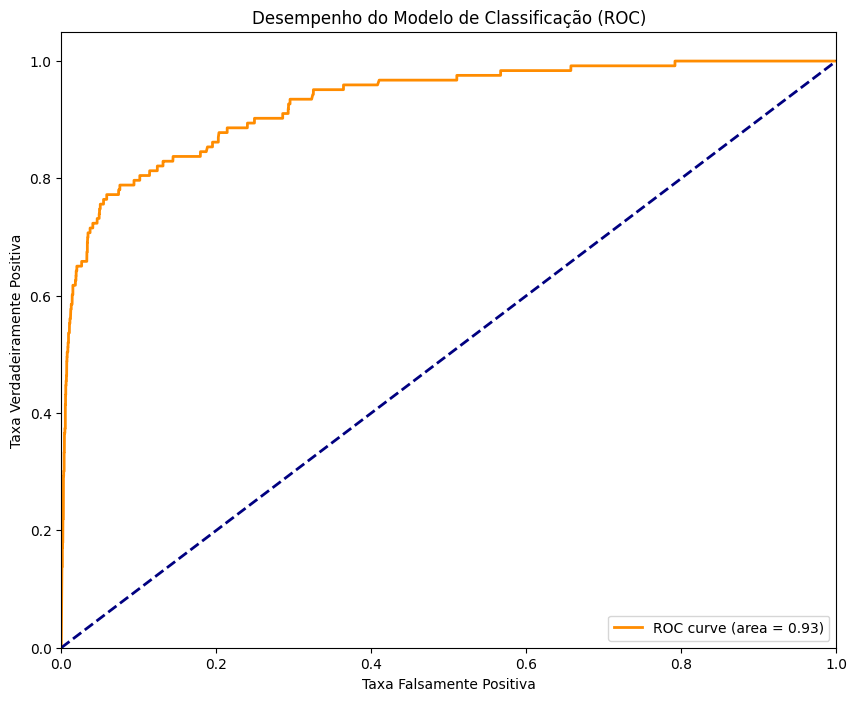


Área sob a Curva (AUC): 0.929393397367632

AUC excelente - o modelo é capaz de distinguir muito bem entre as classes positiva e negativa.


In [211]:
from sklearn.metrics import roc_curve, auc, roc_auc_score

# Calcular as probabilidades previstas para a classe positiva (1)
y_pred_prob = model.predict_proba(X_test)[:, 1]

# Calcular a curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calcular a área sob a curva (AUC)
roc_auc = auc(fpr, tpr)

# Plotar a curva ROC
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa Falsamente Positiva')
plt.ylabel('Taxa Verdadeiramente Positiva')
plt.title('Desempenho do Modelo de Classificação (ROC)')
plt.legend(loc="lower right")
plt.show()

# Calcular e imprimir o AUC
print("\nÁrea sob a Curva (AUC):", roc_auc)

# Interpretar a AUC
if roc_auc >= 0.9:
    print("\nAUC excelente - o modelo é capaz de distinguir muito bem entre as classes positiva e negativa.")
elif roc_auc >= 0.8:
    print("\nAUC bom - o modelo é capaz de distinguir bem entre as classes positiva e negativa.")
elif roc_auc >= 0.7:
    print("\nAUC razoável - o modelo é capaz de distinguir moderadamente entre as classes positiva e negativa.")
else:
    print("\nAUC fraco - o modelo não é capaz de distinguir bem entre as classes positiva e negativa.")


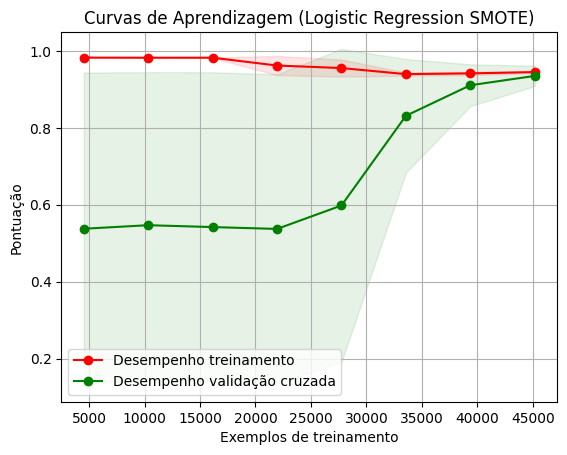

In [212]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve, KFold

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(0.1, 1.0, 8)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Exemplos de treinamento")
    plt.ylabel("Pontuação")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Desempenho treinamento")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Desempenho validação cruzada")

    plt.legend(loc="best")
    return plt

title = "Curvas de Aprendizagem (Logistic Regression SMOTE)"
cv = KFold(n_splits=5)
plot_learning_curve(model, title, X_train_resampled, y_train_resampled, cv=cv)
plt.show()

Regressão Logística: Accuracy = 0.9670833333333333
Árvore de decisão: Accuracy = 0.9718055555555556
Random Forest: Accuracy = 0.97


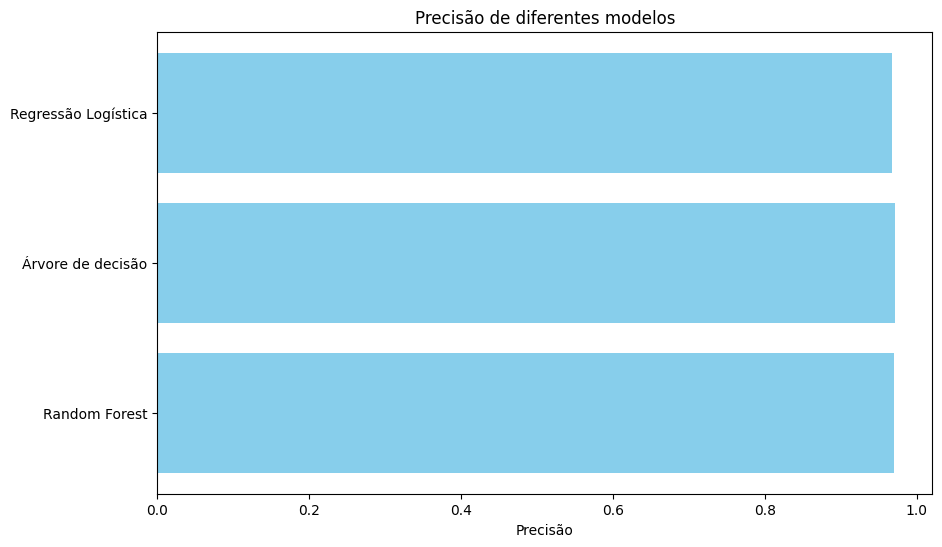

In [9]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE

# Definir os modelos
models = {
    'Regressão Logística': LogisticRegression(C=100, penalty='l2'),
    'Árvore de decisão': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}

# Dividir os dados em conjunto de treinamento e teste
X = df[['more_90_days_overdue', 'age', 'total_loan', 'number_dependents_median']]
y = df['default_flag']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Aplicar SMOTE apenas no conjunto de treinamento
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Lista para armazenar as acurácias
accuracies = []

# Treinar e avaliar cada modelo
for name, model in models.items():
    model.fit(X_train_resampled, y_train_resampled)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print(f"{name}: Accuracy = {accuracy}")

# Plotar o gráfico de barras das acurácias
plt.figure(figsize=(10, 6))
plt.barh(np.arange(len(models)), accuracies, color='skyblue')
plt.yticks(np.arange(len(models)), models.keys())
plt.xlabel('Precisão')
plt.title('Precisão de diferentes modelos')
plt.gca().invert_yaxis()  # Inverter a ordem dos modelos no eixo y para que o modelo com a maior acurácia fique no topo
plt.show()


Decision Tree:
Accuracy: 0.9845833333333334

Confusion Matrix:
 [[7035   42]
 [  69   54]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      7077
           1       0.56      0.44      0.49       123

    accuracy                           0.98      7200
   macro avg       0.78      0.72      0.74      7200
weighted avg       0.98      0.98      0.98      7200



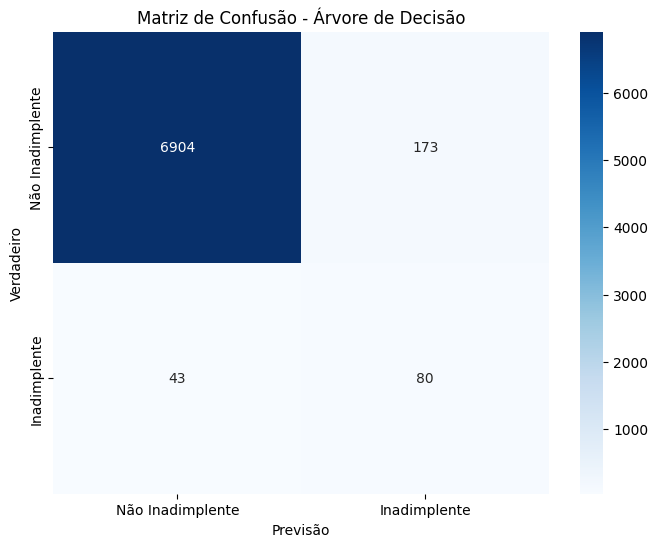


 Apos balanceamento decision Tree:
Accuracy: 0.9845833333333334

Confusion Matrix:
 [[7035   42]
 [  69   54]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      7077
           1       0.56      0.44      0.49       123

    accuracy                           0.98      7200
   macro avg       0.78      0.72      0.74      7200
weighted avg       0.98      0.98      0.98      7200



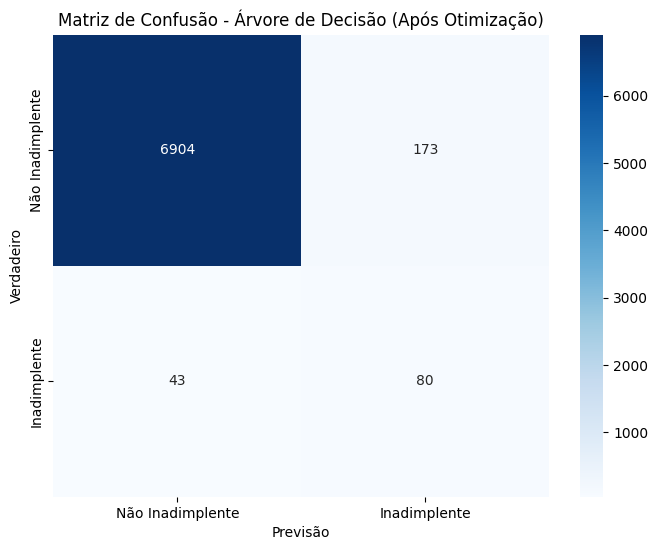

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

# Convertendo variáveis categóricas em numéricas
le = LabelEncoder()
df['sex'] = le.fit_transform(df['sex'])
df['clean_loan_type'] = le.fit_transform(df['clean_loan_type'])

# Preenchendo valores ausentes
df.fillna(df.median(), inplace=True)

# Dividir os dados em conjunto de treinamento e teste
X = df[['more_90_days_overdue', 'age', 'total_loan', 'number_dependents_median']]
y = df['default_flag']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Criar e treinar o modelo de Árvore de Decisão
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Fazer previsões e avaliar o modelo de Árvore de Decisão
y_pred_dt = dt_model.predict(X_test)
print("Decision Tree:")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))

# Visualizar a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=['Não Inadimplente', 'Inadimplente'], yticklabels=['Não Inadimplente', 'Inadimplente'])
plt.xlabel('Previsão')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão - Árvore de Decisão')
plt.show()

# Aplicar SMOTE apenas no conjunto de treinamento
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Fazer previsões e avaliar o modelo de Árvore de Decisão apos
y_pred_dt = dt_model.predict(X_test)
print("\n Apos balanceamento decision Tree:")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))

# Visualizar a matriz de confusão após otimização
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=['Não Inadimplente', 'Inadimplente'], yticklabels=['Não Inadimplente', 'Inadimplente'])
plt.xlabel('Previsão')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão - Árvore de Decisão (Após Otimização)')
plt.show()


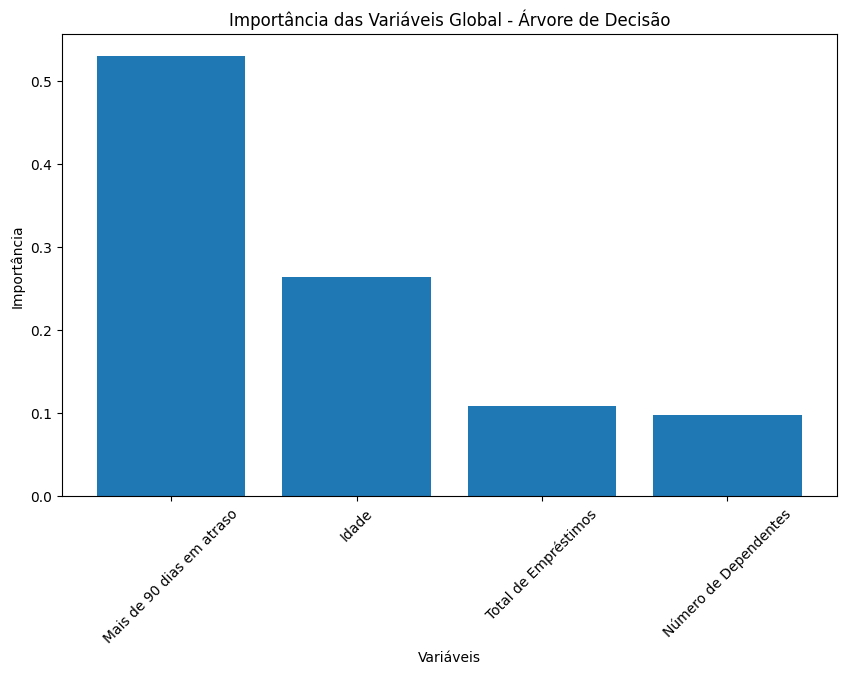

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Obter a importância das variáveis
importances = dt_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Nome das variáveis
#feature_names = ['Mais de 90 dias em atraso', 'Atraso de 30-59 dias', 'Idade', 'Atraso de 60-89 dias', 'Total de Empréstimos', 'Número de Dependentes']
feature_names = ['Mais de 90 dias em atraso', 'Idade', 'Total de Empréstimos', 'Número de Dependentes']

# Plotar a importância das variáveis
plt.figure(figsize=(10, 6))
plt.title('Importância das Variáveis Global - Árvore de Decisão')
plt.bar(range(X_train.shape[1]), importances[indices], align='center')
plt.xticks(range(X_train.shape[1]), [feature_names[i] for i in indices], rotation=45)
plt.xlabel('Variáveis')
plt.ylabel('Importância')
plt.show()

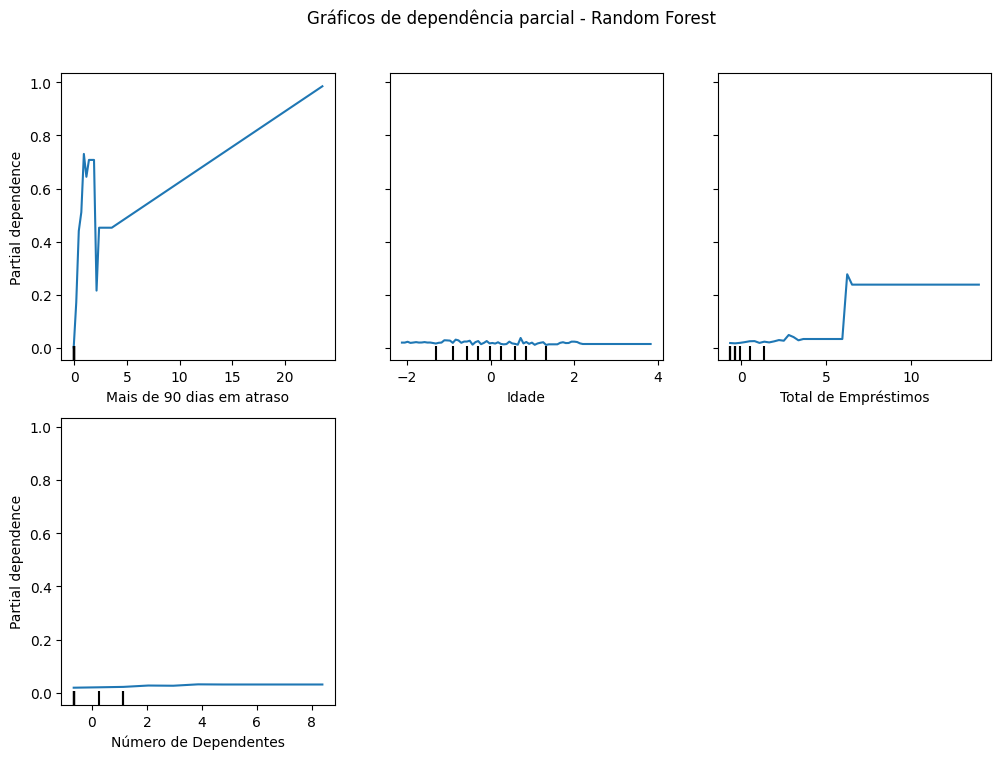

In [12]:
from sklearn.inspection import PartialDependenceDisplay

# Plotar Partial Dependence Plots
fig, ax = plt.subplots(figsize=(12, 8))
#PartialDependenceDisplay.from_estimator(rf_model, X_train, features=[0, 1, 2, 3, 4, 5], feature_names=feature_names, ax=ax)
PartialDependenceDisplay.from_estimator(dt_model, X_train, features=[0, 1, 2, 3], feature_names=feature_names, ax=ax)
plt.suptitle('Gráficos de dependência parcial - Random Forest')
plt.subplots_adjust(top=0.9)  # ajustar a posição do título
plt.show()

In [13]:
import lime
import lime.lime_tabular
from IPython.display import display, HTML

# Criar um explicador LIME
explainer = lime.lime_tabular.LimeTabularExplainer(X_train, feature_names=feature_names, class_names=['Não Inadimplente', 'Inadimplente'], discretize_continuous=True)

# Escolher uma observação para explicar
i = 1
exp = explainer.explain_instance(X_test[i], dt_model.predict_proba, num_features=len(feature_names))

# Obter o HTML da explicação
exp_html = exp.as_html()

# Adicionar título e customizar estilo
custom_html = f"""
    <div style="font-family: Arial; font-size: 16px; color: white;">
        <h2 style="font-weight: bold;">Explicação da Previsão Local</h2>
        {exp_html}
    </div>
"""

# Mostrar o HTML customizado
display(HTML(custom_html))

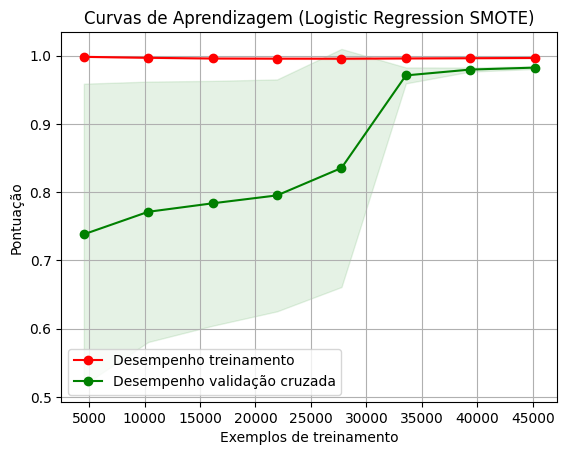

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve, KFold

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(0.1, 1.0, 8)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Exemplos de treinamento")
    plt.ylabel("Pontuação")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Desempenho treinamento")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Desempenho validação cruzada")

    plt.legend(loc="best")
    return plt

title = "Curvas de Aprendizagem (Logistic Regression SMOTE)"
cv = KFold(n_splits=5)
plot_learning_curve(dt_model, title, X_train_resampled, y_train_resampled, cv=cv)
plt.show()